# 정규화 선형 회귀 

정규화는 regularization, penalized라고 함. 분산을 감소시키고 weight를 줄이고자 하는 노력이다.

정규화(regularized) 선형 회귀 방법은 선형 회귀 계수(weight)에 대한 제약 조건을 추가함으로써 계수의 분산을 감소시키는 방법이다. Regularized Method, Penalized Method, Contrained Least Squares 이라고도 불리운다.

일반적으로 세가지 정규화 선형 회귀 모형이 사용된다.

* Ridge 회귀 모형 
* LASSO 회귀 모형 
* Elastic Net 회귀 모형

## Ridge 회귀 모형

Ridge 회귀 모형에서는 가중치들의 제곱합(squared sum of weights)을 최소화하는 것을 추가적인 제약 조건으로 한다.

$$
\begin{eqnarray}
\text{cost} 
&=& \sum e_i^2 + \lambda \sum w_i^2
\end{eqnarray}
$$

$\lambda$는 기존의 잔차 제곱합과 추가적 제약 조건의 비중을 조절하기 위한 하이퍼 모수(hyper parameter)이다. $\lambda$가 크면 정규화 정도가 커지고 가중치의 값들이 작아진다. $\lambda$가 작아지면 정규화 정도가 작아지며 $\lambda$ 가 0이 되면 일반적인 선형 회귀 모형이 된다.

여기서 람다와 알파를 섞어서 사용하겠다.

* weight를 줄여야 한다. 그렇다고 weight의 합을 얼마라고 규정하는 것은 너무 심한 제한이다.
* 우리의 목표는 원래 에러(residual, 잔차)를 줄이는 것이다. 목표를 추가한다? 에러의 목표를 어떻게 추가해? 람다로. 가중치를 줘서

* 가중치 자체를 줄여야 하는 것인데 알파가 커지면 본말이 전도가 된다. 알파가 엄청 커지면 weight는 모두 0이 된다. 람다를 얼마를 줘야 적정한가?

## LASSO 회귀 모형

LASSO(Least Absolute Shrinkage and Selection Operator) 회귀 모형은 가중치의 절대값의 합을 최소화하는 것을 추가적인 제약 조건으로 한다.

$$
\begin{eqnarray}
\text{cost} 
&=& \sum e_i^2 + \lambda \sum | w_i |
\end{eqnarray}
$$

## Elastic Net 회귀 모형

Elastic Net 회귀 모형은 가중치의 절대값의 합과 제곱합을 동시에 제약 조건으로 가지는 모형이다.


$$
\begin{eqnarray}
\text{cost} 
&=& \sum e_i^2 + \lambda_1 \sum | w_i | + \lambda_2 \sum w_i^2
\end{eqnarray}
$$

$\lambda_1$, $\lambda_2$ 두 개의 하이퍼 모수를 가진다.

## statsmodels의 정규화 회귀 모형

statsmodels 패키지는 OLS 선형 회귀 모형 클래스의 `fit_regularized` 메서드를 사용하여 Elastic Net 모형 계수를 구할 수 있다.(Elastic Net만 지원. Ridge, LASSO는 지원 X)

* http://www.statsmodels.org/dev/generated/statsmodels.regression.linear_model.OLS.fit_regularized.html

하이퍼 모수는 다음과 같이 모수 $\text{alpha} $ 와 $\text{L1_wt}$ 로  정의된다.

$$
0.5 \times \text{RSS}/N + \text{alpha} \times \big( 0.5 \times (1-\text{L1_wt})\sum w_i^2 + \text{L1_wt} \sum |w_i| \big)
$$

* Ridge, LASSO보다 중요한 것은 알파. 알파는 얼마나 정규화 하는 것인지?
* 알파가 커지면 정규화가 더 잘되고 더 과적합이 안 생긴다.
* 하지만 더 잘 안 맞게 된다.(스코어가 낮아지는 것을 볼 수 있다.) 
* weight 줄이는 일을 하게 되기 때문에

In [1]:
np.random.seed(0)
n_samples = 30
X = np.sort(np.random.rand(n_samples))
y = np.cos(1.5 * np.pi * X) + np.random.randn(n_samples) * 0.1

In [2]:
dfX = pd.DataFrame(X, columns=["x"])
dfX = sm.add_constant(dfX)
dfy = pd.DataFrame(y, columns=["y"])
df = pd.concat([dfX, dfy], axis=1)

In [3]:
model = sm.OLS.from_formula("y ~ x + I(x**2) + I(x**3) + I(x**4) + I(x**5)", data=df)
result1 = model.fit()
result1.params

Intercept     1.126872
x            -2.178934
I(x ** 2)     0.831280
I(x ** 3)   -26.179823
I(x ** 4)    48.667360
I(x ** 5)   -22.317003
dtype: float64

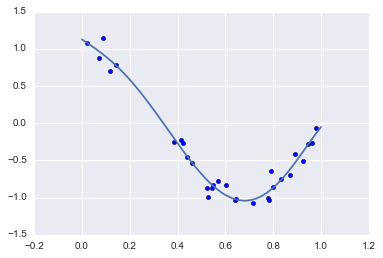

In [4]:
def plot_statsmodels(result):
    plt.scatter(X, y)
    xx = np.linspace(0, 1, 1000)
    dfxx = pd.DataFrame(xx, columns=["x"])
    dfxx = sm.add_constant(dfxx)
    plt.plot(xx, result.predict(dfxx))
    plt.show()
    
plot_statsmodels(result1)

Intercept    0.707154
x           -2.229501
I(x ** 2)   -0.842831
I(x ** 3)    0.197524
I(x ** 4)    0.813785
I(x ** 5)    1.160351
dtype: float64


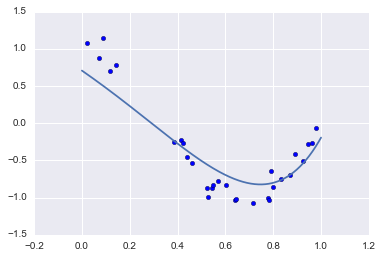

In [5]:
result2 = model.fit_regularized(alpha=0.01, L1_wt=0)
print(result2.params)
plot_statsmodels(result2)

Intercept    0.781925
x           -2.655537
I(x ** 2)   -0.253033
I(x ** 3)    0.000000
I(x ** 4)    0.671228
I(x ** 5)    1.280714
dtype: float64


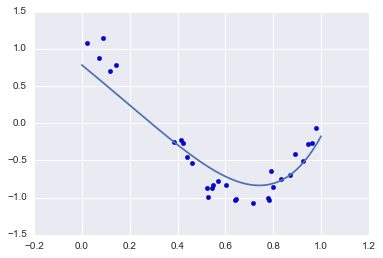

In [6]:
result3 = model.fit_regularized(alpha=0.01, L1_wt=0.5)
print(result3.params)
plot_statsmodels(result3) 

Intercept    0.914843
x           -3.073134
I(x ** 2)    0.000000
I(x ** 3)    0.000000
I(x ** 4)    0.000000
I(x ** 5)    2.092835
dtype: float64


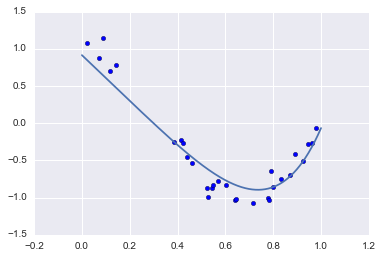

In [7]:
result4 = model.fit_regularized(alpha=0.01, L1_wt=1)
print(result4.params)
plot_statsmodels(result4) 

## Scikit-Learn의 정규화 회귀 모형

Scikit-Learn 패키지에서는 정규화 회귀 모형을 위한 `Ridge`, `Lasso`, `ElasticNet` 이라는 별도의 클래스를 제공한다. 각 모형에 대한 최적화 목적 함수는 다음과 같다.

* http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html

$$
\text{RSS} + \text{alpha} \sum w_i^2
$$

* http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html

$$
0.5 \times \text{RSS}/N + \text{alpha} \sum |w_i|
$$

* http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html

$$
0.5 \times \text{RSS}/N + 0.5 \times \text{alpha} \times \big(0.5 \times  (1-\text{l1_ratio})\sum w_i^2 + \text{l1_ratio} \sum |w_i| \big)
$$


In [8]:
def plot_sklearn(model):
    plt.scatter(X, y)
    xx = np.linspace(0, 1, 1000)
    plt.plot(xx, model.predict(xx[:, np.newaxis]))
    plt.show()

In [9]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet

In [10]:
poly = PolynomialFeatures(3)

pipeline() 안에는 리스트 넣고 그 안에 튜플을 만들어야 한다. 이런 방식은 named 방식이라고 한다. 왜 이런 방식을 만드냐면 튜플 안에 들어간 것은 객체다.

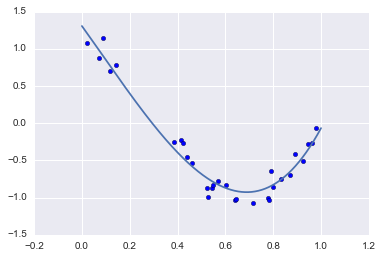

In [11]:
model = make_pipeline(poly, Ridge(alpha=0.01)).fit(X[:, np.newaxis], y)
plot_sklearn(model)

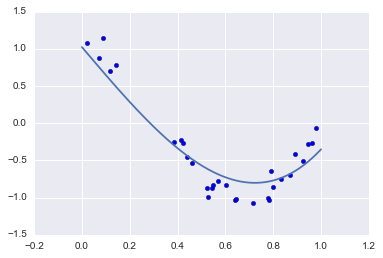

In [12]:
model = make_pipeline(poly, Lasso(alpha=0.01)).fit(X[:, np.newaxis], y)
plot_sklearn(model)

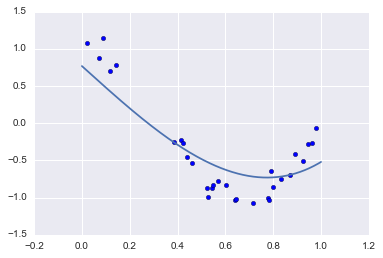

In [13]:
model = make_pipeline(poly, ElasticNet(alpha=0.01, l1_ratio=0.5)).fit(X[:, np.newaxis], y)
plot_sklearn(model)

## 정규화 모형의 장점

정규화 모형은 오차-분산 트레이드오프(bias-variance trade-off) 원리에 따라 분산을 감소시키는 효과를 가진다.

* 에러는 수량화로 RSS로 하면 된다? Ridge는 크고 LinearRegression은 작다. 
* 흔들리는 정도를 수량화로? 교차검증(CV)
* score의 표준편차(standard deviation)가 Ridge는 작고 LinearRegression은 크다.

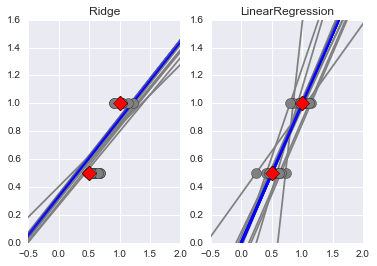

In [14]:
X_train = np.c_[.5, 1].T
y_train = [.5, 1]
X_test = np.c_[-1, 3].T
np.random.seed(0)

models = {"LinearRegression": LinearRegression(), 
          "Ridge": Ridge(alpha=0.1)}

for i, (name, model) in enumerate(models.items()):
    ax = plt.subplot(1, 2, i+1)
    for _ in range(10):
        this_X = .1 * np.random.normal(size=(2, 1)) + X_train
        model.fit(this_X, y_train)
        ax.plot(X_test, model.predict(X_test), color='.5')
        ax.scatter(this_X, y_train, s=100, c='.5', marker='o', zorder=10)
        model.fit(X_train, y_train)
        ax.plot(X_test, model.predict(X_test), linewidth=3, color='blue', alpha=0.5)
        ax.scatter(X_train, y_train, s=100, c='r', marker='D', zorder=10)
        plt.title(name)
        ax.set_xlim(-0.5, 2)
        ax.set_ylim(0, 1.6)

## Ridge 모형과 Lasso 모형의 차이

- 우리가 줄이려는 것은 RSS와 같은 것
- (오타)가로 세로축은 베타가 아니고 w(weight)
- 똑같은 성능=똑같은 에러값을 나타낸다. 성격은 크게 변하지 않는다.
- LASSO를 쓰게 되면 다중공선성을 줄일 수 있다.
- 0이 나온 경우에는 없어도 되기 때문에. 피쳐를 없앤다면 애들부터 없애도 되는 경우
- 정리하면 줄이는 방법 4가지가 있다. 싱글~, 어노바 테이블. 섬오브 스퀘어 보고. 조정결정계수 보고. 마지막으로 라쏘나 일레스틱 쓰는 방법

Ridge 모형은 가중치 계수를 한꺼번에 축소시키는데 반해 Lasso 모형은 일부 가중치 계수가 먼저 0으로 수렴하는 특성이 있다.

<img src="https://datascienceschool.net/upfiles/10a19727037b4898984a4330c1285486.png">

Lasso가 왜 0이 떨어지느냐? 원은 보통 꼭지점에 맞는 경우가 대다수다.

In [15]:
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()
X = diabetes.data
y = diabetes.target

In [16]:
ridge0 = Ridge(alpha=0).fit(X, y)
p0 = pd.Series(np.hstack([ridge0.intercept_, ridge0.coef_]))
ridge1 = Ridge(alpha=1).fit(X, y)
p1 = pd.Series(np.hstack([ridge1.intercept_, ridge1.coef_]))
ridge2 = Ridge(alpha=2).fit(X, y)
p2 = pd.Series(np.hstack([ridge2.intercept_, ridge2.coef_]))
pd.DataFrame([p0, p1, p2]).T

,0,1,2
0,152.133484,152.133484,152.133484
1,-10.012198,29.465746,33.684368
2,-239.819089,-83.154885,-41.040187
3,519.839787,306.351627,223.029964
4,324.390428,201.629434,152.203371
5,-792.184162,5.909369,20.941211
6,476.745838,-29.515927,-2.749722
7,101.044570,-152.040465,-121.063689
8,177.064176,117.311715,103.717329
9,751.279321,262.944995,195.099906


In [20]:
ridge0 = Ridge(alpha=0).fit(X, y)
p0 = pd.Series(np.hstack([ridge0.intercept_, ridge0.coef_]))
ridge1 = Ridge(alpha=1).fit(X, y)
p1 = pd.Series(np.hstack([ridge1.intercept_, ridge1.coef_]))
ridge2 = Ridge(alpha=2).fit(X, y)
p2 = pd.Series(np.hstack([ridge2.intercept_, ridge2.coef_]))
ridge3 = Ridge(alpha=100).fit(X, y)
p3 = pd.Series(np.hstack([ridge3.intercept_, ridge3.coef_]))
ridge4 = Ridge(alpha=500).fit(X, y)
p4 = pd.Series(np.hstack([ridge4.intercept_, ridge4.coef_]))
ridge5 = Ridge(alpha=1000).fit(X, y)
p5 = pd.Series(np.hstack([ridge5.intercept_, ridge5.coef_]))
df = pd.DataFrame([p0, p1, p2, p3, p4, p5]).T
df.columns=["alpha0", "alpha1", "alpha2", "alpha100", "alpha500", "alpha1000"]
df

,alpha0,alpha1,alpha2,alpha100,alpha500,alpha1000
0,152.133484,152.133484,152.133484,152.133484,152.133484,152.133484
1,-10.012198,29.465746,33.684368,2.897090,0.602385,0.302682
2,-239.819089,-83.154885,-41.040187,0.585254,0.134790,0.068550
3,519.839787,306.351627,223.029964,9.240719,1.888440,0.946818
4,324.390428,201.629434,152.203371,6.931321,1.420587,0.712509
5,-792.184162,5.909369,20.941211,3.230957,0.678157,0.341157
6,476.745838,-29.515927,-2.749722,2.616766,0.555231,0.279690
7,101.044570,-152.040465,-121.063689,-6.174550,-1.269353,-0.636902
8,177.064176,117.311715,103.717329,6.678027,1.381755,0.693868
9,751.279321,262.944995,195.099906,8.876864,1.820553,0.913196


In [17]:
lasso0 = Lasso(alpha=0.0001).fit(X, y)
p0 = pd.Series(np.hstack([lasso0.intercept_, lasso0.coef_]))
lasso1 = Lasso(alpha=0.1).fit(X, y)
p1 = pd.Series(np.hstack([lasso1.intercept_, lasso1.coef_]))
lasso2 = Lasso(alpha=10).fit(X, y)
p2 = pd.Series(np.hstack([lasso2.intercept_, lasso2.coef_]))
pd.DataFrame([p0, p1, p2]).T

,0,1,2
0,152.133484,152.133484,152.133484
1,-9.910816,-0.000000,0.000000
2,-239.727144,-155.362882,0.000000
3,519.881966,517.182017,0.000000
4,324.294322,275.082351,0.000000
5,-784.988701,-52.540269,0.000000
6,471.210031,-0.000000,0.000000
7,97.612539,-210.159753,-0.000000
8,175.802361,0.000000,0.000000
9,748.684614,483.914409,0.000000


## path 메서드

`Lasso` 와 `ElasticNet`  클래스는 하이퍼 모수 `alpha` 값의 변화에 따른 계수의 변화를 자동으로 계산하는 `path` 메서드를 제공한다.
`lasso_path()`, `enet_path()` 명령어도 `path` 메서드와 동일한 기능을 수행한다.

In [18]:
lasso = Lasso()
alphas, coefs, _ = lasso.path(X, y, alphas=np.logspace(-6, 1, 8))
df = pd.DataFrame(coefs, columns=alphas)
df

,10.0,1.0,0.1,0.01,0.001,0.0001,1e-05,1e-06
0,0.0,0.359018,10.286331,33.147694,8.705495,-5.452332,-9.080737,-9.902637
1,0.0,0.000000,0.285976,-35.245064,-178.075235,-230.060677,-238.307326,-239.649466
2,0.0,3.259767,37.464643,211.024640,450.882945,517.356795,520.767952,519.973879
3,0.0,2.204356,27.544898,144.560242,281.073242,317.436537,323.234112,324.258708
4,0.0,0.528646,11.108848,21.931303,-44.061899,-240.402810,-635.231952,-772.936350
5,0.0,0.250935,8.355882,0.000000,-77.939017,40.281395,352.230141,461.473758
6,-0.0,-1.861363,-24.120806,-115.619846,-188.950843,-136.775239,31.891364,92.542411
7,0.0,2.114454,25.505488,100.658528,119.797535,117.921788,158.412929,174.749027
8,0.0,3.105841,35.465757,185.326164,393.706827,533.930194,691.527537,743.979234
9,0.0,1.769851,22.894981,96.257133,98.943979,73.934816,68.648179,67.740903


In [21]:
lasso = Lasso()
alphas, coefs, _ = lasso.path(X, y, alphas=np.logspace(0, 1, 10))
df = pd.DataFrame(coefs, columns=alphas)
df
#0이 나온 경우에는 영향력이 없는 것들이 먼저 떨어져 나간다.

,10.0,7.74263682681,5.99484250319,4.64158883361,3.5938136638,2.78255940221,2.15443469003,1.6681005372,1.29154966501,1.0
0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.057438,0.359018
1,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.0,0.0,0.0,0.0,0.195080,0.542478,0.989810,1.565985,2.307328,3.259767
3,0.0,0.0,0.0,0.0,0.000000,0.161290,0.497900,0.931347,1.488779,2.204355
4,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.190822,0.528645
5,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.250935
6,-0.0,-0.0,-0.0,-0.0,-0.000000,-0.038442,-0.339060,-0.725907,-1.223212,-1.861363
7,0.0,0.0,0.0,0.0,0.000000,0.132055,0.459565,0.880879,1.421836,2.114454
8,0.0,0.0,0.0,0.0,0.153186,0.488335,0.919695,1.475118,2.189260,3.105841
9,0.0,0.0,0.0,0.0,0.000000,0.006025,0.297197,0.671848,1.153108,1.769851


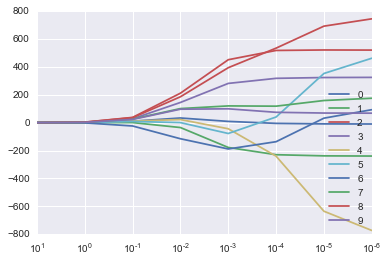

In [19]:
df.T.plot(logx=True)
plt.show()

0.00372759372031


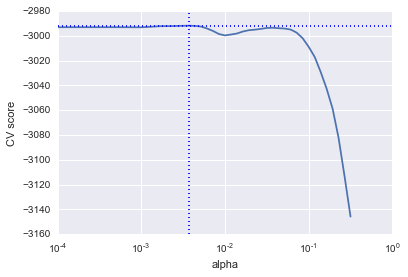

In [23]:
from sklearn.linear_model import LassoCV

alphas = np.logspace(-4, -.5, 50)
lasso_cv = LassoCV(alphas=alphas, cv=5)
lasso_cv.fit(X, y)

print(lasso_cv.alpha_ )

scores = -lasso_cv.mse_path_.mean(axis=1)
plt.semilogx(lasso_cv.alphas_, scores)
plt.axhline(np.max(scores), linestyle=':')    
plt.axvline(lasso_cv.alpha_ , linestyle=':')   
plt.ylabel('CV score')
plt.xlabel('alpha')
plt.show()